<h1>Tiền xử lý dữ liệu Hotel Booking Demand

<h4>Import các thu viện numpy, pandas, matplotlib và seaborn

In [1]:
# Linear algebra
import numpy as np
# Data processing
import pandas as pd
# Data vissualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style
# Datetime
import datetime
from datetime import datetime

<p>Đọc dữ liệu đầu vào

In [2]:
with open("E:\\IS217\\TienXuLyDuLieu\\hotel_booking.csv") as f:
    df = pd.read_csv(f)

<p>Xem xét dữ liệu ban đầu với hàm head() và info()

In [3]:
df.head(12)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.0,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.0,0,1,Check-Out,2015-07-03,Jasmine Fletcher,JFletcher43@xfinity.com,190-271-6743,************9263
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,...,Transient,107.0,0,0,Check-Out,2015-07-03,Dylan Rangel,Rangel.Dylan@comcast.net,420-332-5209,************6994
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,...,Transient,103.0,0,1,Check-Out,2015-07-03,William Velez,Velez_William@mail.com,286-669-4333,************8729
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,...,Transient,82.0,0,1,Canceled,2015-05-06,Steven Murphy,Steven.Murphy54@aol.com,341-726-5787,************3639
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,...,Transient,105.5,0,0,Canceled,2015-04-22,Michael Moore,MichaelMoore81@outlook.com,316-648-6176,************9190


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

<p>Mô tả các giá trị định lượng

In [5]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


<h4>Thống kê mô tả

<li>Thống kê số lượng đặt phòng thành công hoặc thất bại

Text(0.5, 1.0, 'Số lượng đặt phòng và hủy đặt phòng')

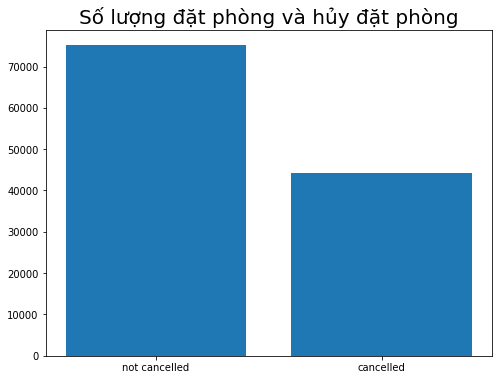

In [6]:
fig, ax = plt.subplots(figsize=(8, 6))

vcs = df['is_canceled'].value_counts()

ax.bar(vcs.index, vcs)
ax.set_xticks([0, 1])
ax.set_xticklabels(['not cancelled', 'cancelled'])
ax.set_title('Số lượng đặt phòng và hủy đặt phòng', fontsize=20)

<li>Xem xét mối quan hệ giữa các dữ liệu bị hủy đặt phòng tại hai loại hình khách sạn trong khoảng thời gian từ khi đtặ phòng cho tới khi nhận được phòng.

C:\Users\phuon\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


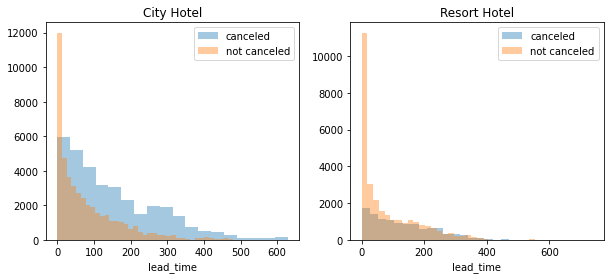

In [13]:
canceled = 'canceled'
not_canceled ='not canceled'
fig, axes = plt.subplots(nrows = 1,ncols =2,figsize = (10,4))
city = df[df['hotel']=='City Hotel']
resort = df[df['hotel']=='Resort Hotel']
ax = sns.distplot(city[city['is_canceled']==1].lead_time.dropna(), bins = 18,label = canceled, ax =axes[0],kde = False)
ax = sns.distplot(city[city['is_canceled']==0].lead_time.dropna(), bins = 40,label =not_canceled, ax =axes[0],kde = False)
ax.legend()
ax.set_title('City Hotel')
ax = sns.distplot(resort[resort['is_canceled']==1].lead_time.dropna(), bins = 18,label =canceled, ax =axes[1],kde = False)
ax = sns.distplot(resort[resort['is_canceled']==0].lead_time.dropna(), bins = 40,label =not_canceled, ax =axes[1],kde = False)
ax.legend()
_=ax.set_title('Resort Hotel')

<li>Xem xét sự tương quan giữa việc thuê phòng vào cuối tuần với hủy đặt phòng tại khách sạn

In [15]:
total = df.groupby('stays_in_weekend_nights')['is_canceled'].count()[:5]
cancels = df.groupby('stays_in_weekend_nights')['is_canceled'].sum()[:5]

In [16]:
cutoff = 3
x = list(total.index[:cutoff])
x.append(cutoff)

y_total = list(total.values[:cutoff])
y_total.append(np.sum(total.values[cutoff:]))

y_cancel = list(cancels.values[:cutoff])
y_cancel.append(np.sum(cancels.values[cutoff:]))

Text(0.5, 0, '# of weekend nights')

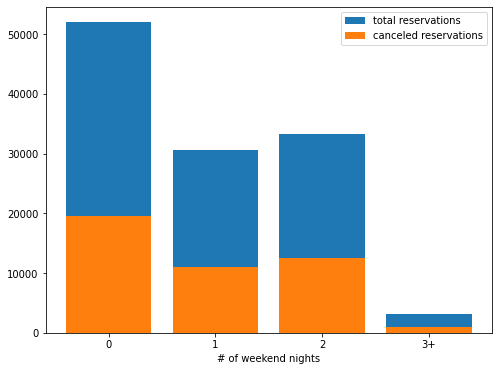

In [17]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.bar(x, y_total, label='total reservations')
ax.bar(x, y_cancel, label='canceled reservations')
ax.legend()
ax.set_xticks([0, 1, 2, 3])
ax.set_xticklabels(['0', '1', '2', '3+'])
ax.set_xlabel('# of weekend nights')

<h4>Tiến hành xóa các cột không có ý nghĩa trong quá trình phân tích

<p>Xóa thuộc tính agent và comany khỏi df vì không cần thiết cho quá trình phân tích

In [5]:
# Xóa cột agent
df = df.drop(["agent"], axis = 1)
# Xóa cột company
df = df.drop(["company"], axis = 1)

<p>Xóa thuộc tính credit_card vì ẩn nhiều thông tin

In [6]:
# Xóa cột credit_card 
df = df.drop(["credit_card"], axis = 1)

<p>Dữ liệu sau khi xóa bỏ các cột không cần thiết còn lại 33 cột

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 33 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

<h4>Xóa những thuộc tính null hoặc unknown

<h5>Xóa dữ liệu bị thiếu
<ul>

<li>Tìm trong dữ liệu có giá trị null hay không

In [8]:
missing_data= df.isnull().sum()
print(missing_data)

hotel                               0
is_canceled                         0
lead_time                           0
arrival_date_year                   0
arrival_date_month                  0
arrival_date_week_number            0
arrival_date_day_of_month           0
stays_in_weekend_nights             0
stays_in_week_nights                0
adults                              0
children                            4
babies                              0
meal                                0
country                           488
market_segment                      0
distribution_channel                0
is_repeated_guest                   0
previous_cancellations              0
previous_bookings_not_canceled      0
reserved_room_type                  0
assigned_room_type                  0
booking_changes                     0
deposit_type                        0
days_in_waiting_list                0
customer_type                       0
adr                                 0
required_car

<p>Lấy ra 5 thuộc tính có số ượng giá trị rỗng nhiều nhất

In [9]:
total = df.isnull().sum().sort_values(ascending=False) #Tìm trong dữ liệu giá null, tính tổng chúng lại, sắp xếp theo tăng dần  = False tức là sắp giảm
percent_1=df.isnull().sum()/df.isnull().count()*100 #Tổng giá trị null của một cột/ số dòng của cột null đó 
percent_2 = (round(percent_1,1)).sort_values(ascending = False) #Làm tròn 1 chữ số và sort giảm dần
missing_data = pd.concat([total,percent_2],axis=1,keys=['Total','%'])
missing_data.head(5)

,Total,%
country,488,0.4
children,4,0.0
hotel,0,0.0
customer_type,0,0.0
assigned_room_type,0,0.0


<p>=> Có thể nhận thấy, thuộc tính hiện đang thiếu không ảnh hưởng nghiệm trọng đễn quá trình khai thác và xử lý dữ liệu

<p>Thuộc tính country thuộc nhóm định tính (nominal) nên ta thực hiện như sau:

In [10]:
#Xem xét thông tin thuộc tính country 
df['country'].describe()


count     118902
unique       177
top          PRT
freq       48590
Name: country, dtype: object

In [11]:
# Ta nhận thấy giá trị "PRT" phổ biến nhất nên ta chọn giá trị đó để điền vào các vị trí còn trống
common_value='PRT'

for dataset in [df]:
    dataset['country'] = dataset['country'].fillna(common_value)

<p>Số lượng giá trị null trong thuộc tính children khá ít, nên ta loại bỏ các dòng dữ liệu không có giá trị

In [12]:
# Xóa dòng dữ liệu mà thuộc tính children có giá trị null
df.dropna(axis=0,inplace=True,subset=['children'])

In [13]:
#Tìm trong dữ liệu giá null, tính tổng chúng lại, sắp xếp theo tăng dần  = False tức là sắp giảm
total = df.isnull().sum().sort_values(ascending=False) 
#Tổng giá trị null của một cột/ số dòng của cột null đó 
percent_1=df.isnull().sum()/df.isnull().count()*100 
#Làm tròn 1 chữ số và sort giảm dần
percent_2 = (round(percent_1,1)).sort_values(ascending = False) 
missing_data = pd.concat([total,percent_2],axis=1,keys=['Total','%'])
missing_data.head(5)

,Total,%
hotel,0,0.0
previous_cancellations,0,0.0
email,0,0.0
name,0,0.0
reservation_status_date,0,0.0


<li>Thay thế giá trị Undefined thành NaN

In [14]:
df.replace('Undefined', np.nan, inplace=True)

In [15]:
df.head(12)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,0,Transient,0.0,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,0,Transient,0.0,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,Transient,75.0,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,Transient,75.0,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,Transient,98.0,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,Transient,98.0,0,1,Check-Out,2015-07-03,Jasmine Fletcher,JFletcher43@xfinity.com,190-271-6743
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,...,0,Transient,107.0,0,0,Check-Out,2015-07-03,Dylan Rangel,Rangel.Dylan@comcast.net,420-332-5209
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,...,0,Transient,103.0,0,1,Check-Out,2015-07-03,William Velez,Velez_William@mail.com,286-669-4333
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,...,0,Transient,82.0,0,1,Canceled,2015-05-06,Steven Murphy,Steven.Murphy54@aol.com,341-726-5787
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,...,0,Transient,105.5,0,0,Canceled,2015-04-22,Michael Moore,MichaelMoore81@outlook.com,316-648-6176


<li>Giá trị bằng <strong>Unknown</strong> không có ý nghĩa trong quá trình khai thác và xử lý dữ liệu về nhu cầu đặt phòng tại khách sạn nên ta xóa các giá trị <strong>Unknown</strong> đó, dữ liệu kiểu chuỗi rất quan trọng không thể thay thế như kiểu số bằng giá trị trung bình hay giá trị phổ biến nhất. Có hai cách xử lý kiểu <strong>Unknown</strong> chuỗi là xóa bỏ các dòng dữ liệu khỏi dataframe haocwj xem xét tỷ lệ các giá trị còn lại là bao nhiêu rồi thay thế unknown theo đúng tỷ lệ đó.

In [16]:
# Xóa tất cả các giá trị Undefined
df = df.dropna()

</ul>

<p>Dữ liệu sau khi được  thay thế và loại bỏ thu được 119386 dòng dữ liệu với 33 thuộc tính

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118216 entries, 0 to 119389
Data columns (total 33 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           118216 non-null  object 
 1   is_canceled                     118216 non-null  int64  
 2   lead_time                       118216 non-null  int64  
 3   arrival_date_year               118216 non-null  int64  
 4   arrival_date_month              118216 non-null  object 
 5   arrival_date_week_number        118216 non-null  int64  
 6   arrival_date_day_of_month       118216 non-null  int64  
 7   stays_in_weekend_nights         118216 non-null  int64  
 8   stays_in_week_nights            118216 non-null  int64  
 9   adults                          118216 non-null  int64  
 10  children                        118216 non-null  float64
 11  babies                          118216 non-null  int64  
 12  meal            

<h4>Rời rạc hóa dữ liệu tháng

<p>Chuyển đổi thuộc tính tháng bằng chữ sang tháng được biểu diễn bằng số

In [18]:
df["arrival_date_month_number"] = df["arrival_date_month"]


C:\Users\phuon\AppData\Local\Temp\ipykernel_18740\1253506605.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["arrival_date_month_number"] = df["arrival_date_month"]


In [19]:
for dataset in [df]:
    dataset.loc[dataset['arrival_date_month_number']=="January",'arrival_date_month_number']=1
    dataset.loc[dataset['arrival_date_month_number']=="February",'arrival_date_month_number']=2
    dataset.loc[dataset['arrival_date_month_number']=="March",'arrival_date_month_number']=3
    dataset.loc[dataset['arrival_date_month_number']=="April",'arrival_date_month_number']=4
    dataset.loc[dataset['arrival_date_month_number']=="May",'arrival_date_month_number']=5
    dataset.loc[dataset['arrival_date_month_number']=="June",'arrival_date_month_number']=6
    dataset.loc[dataset['arrival_date_month_number']=="July",'arrival_date_month_number']=7
    dataset.loc[dataset['arrival_date_month_number']=="August",'arrival_date_month_number']=8
    dataset.loc[dataset['arrival_date_month_number']=="September",'arrival_date_month_number']=9
    dataset.loc[dataset['arrival_date_month_number']=="October",'arrival_date_month_number']=10
    dataset.loc[dataset['arrival_date_month_number']=="November",'arrival_date_month_number']=11
    dataset.loc[dataset['arrival_date_month_number']=="December",'arrival_date_month_number']=12
    dataset['arrival_date_month_number']=dataset['arrival_date_month_number'].astype(int)

In [20]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,arrival_date_month_number
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,7
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,7
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,7
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,7
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.0,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,7


<h4>Sửa tên các thuộc tính arrival_date_month thành arrival_date_month_name

In [21]:
df.rename(index=str, columns={"arrival_date_month": "arrival_date_month_name"}, inplace=True)

<h4>Thêm các thuộc tính 
<ul>



<li>Thuộc tính id_reservation_status_date

In [22]:
df['reservation_status_date']=pd.to_datetime(df['reservation_status_date'])
df["id_reservation_status_date"] = df["reservation_status_date"].dt.strftime('%Y%m%d')

<li>Thuộc tính arrival_date_full

In [23]:
cols=["arrival_date_year","arrival_date_month_number","arrival_date_day_of_month"]
df['arrival_date_full'] = df[cols].apply(lambda x: '-'.join(x.values.astype(str)), axis="columns")

In [24]:
df['arrival_date_full']=pd.to_datetime(df['arrival_date_full'])
for dataset in [df]:
    print(dataset["arrival_date_full"])

0        2015-07-01
1        2015-07-01
2        2015-07-01
3        2015-07-01
4        2015-07-01
            ...    
119385   2017-08-30
119386   2017-08-31
119387   2017-08-31
119388   2017-08-31
119389   2017-08-29
Name: arrival_date_full, Length: 118216, dtype: datetime64[ns]


In [25]:
df["id_arrival_date"] = df["arrival_date_full"].dt.strftime('%Y%m%d')

<li>Thuộc tính arrival_date_quarter

In [26]:
df["arrival_date_quarter"] = df["arrival_date_full"].dt.quarter
for dataset in [df]:
    print(dataset["arrival_date_quarter"])

0         3
1         3
2         3
3         3
4         3
         ..
119385    3
119386    3
119387    3
119388    3
119389    3
Name: arrival_date_quarter, Length: 118216, dtype: int64


<li>Thuộc tính arrival_date_day_of_week với thứ 2 là 0 và chủ nhật là 6

In [27]:
df["arrival_date_day_of_week"] = df["arrival_date_full"].dt.dayofweek
for dataset in [df]:
    print(dataset["arrival_date_day_of_week"])

0         2
1         2
2         2
3         2
4         2
         ..
119385    2
119386    3
119387    3
119388    3
119389    1
Name: arrival_date_day_of_week, Length: 118216, dtype: int64


<li>Thuộc tính arrival_date_day_name

In [28]:
df["arrival_date_day_name"] = df["arrival_date_full"].dt.day_name()
for dataset in [df]:
    print(dataset["arrival_date_day_name"])

0         Wednesday
1         Wednesday
2         Wednesday
3         Wednesday
4         Wednesday
            ...    
119385    Wednesday
119386     Thursday
119387     Thursday
119388     Thursday
119389      Tuesday
Name: arrival_date_day_name, Length: 118216, dtype: object


<li>Thuộc tính arrival_date_day_name_abbrev

In [29]:
df['arrival_date_day_name_abbrev'] = df['arrival_date_full'].dt.day_name().str[:3]
for dataset in [df]:
    print(dataset["arrival_date_day_name_abbrev"])

0         Wed
1         Wed
2         Wed
3         Wed
4         Wed
         ... 
119385    Wed
119386    Thu
119387    Thu
119388    Thu
119389    Tue
Name: arrival_date_day_name_abbrev, Length: 118216, dtype: object


<li>Thuộc tính arrival_date_month_name_abbrev

In [30]:
df['arrival_date_month_name_abbrev'] = df['arrival_date_full'].dt.month_name().str[:3]
for dataset in [df]:
    print(dataset["arrival_date_month_name_abbrev"])

0         Jul
1         Jul
2         Jul
3         Jul
4         Jul
         ... 
119385    Aug
119386    Aug
119387    Aug
119388    Aug
119389    Aug
Name: arrival_date_month_name_abbrev, Length: 118216, dtype: object


<li>Thuộc tính arrival_date_weekday_flag
</ul>

In [31]:
df["arrival_date_weekday_flag"] = df["arrival_date_day_of_week"]
for dataset in [df]:
    dataset['arrival_date_weekday_flag']=dataset['arrival_date_weekday_flag'].astype(int)
    dataset.loc[dataset['arrival_date_weekday_flag']<=5,'arrival_date_weekday_flag']=0
    dataset.loc[dataset['arrival_date_weekday_flag']>5,'arrival_date_weekday_flag']=1

<p>Dữ liệu sau khi được bổ sung thu được 119386 dòng dữ liệu với 41 thuộc tính

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 118216 entries, 0 to 119389
Data columns (total 43 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           118216 non-null  object        
 1   is_canceled                     118216 non-null  int64         
 2   lead_time                       118216 non-null  int64         
 3   arrival_date_year               118216 non-null  int64         
 4   arrival_date_month_name         118216 non-null  object        
 5   arrival_date_week_number        118216 non-null  int64         
 6   arrival_date_day_of_month       118216 non-null  int64         
 7   stays_in_weekend_nights         118216 non-null  int64         
 8   stays_in_week_nights            118216 non-null  int64         
 9   adults                          118216 non-null  int64         
 10  children                        118216 non-null  float64     

In [33]:
df.head(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month_name,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,arrival_date_month_number,id_reservation_status_date,arrival_date_full,id_arrival_date,arrival_date_quarter,arrival_date_day_of_week,arrival_date_day_name,arrival_date_day_name_abbrev,arrival_date_month_name_abbrev,arrival_date_weekday_flag
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,7,20150701,2015-07-01,20150701,3,2,Wednesday,Wed,Jul,0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,7,20150701,2015-07-01,20150701,3,2,Wednesday,Wed,Jul,0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,7,20150702,2015-07-01,20150701,3,2,Wednesday,Wed,Jul,0
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,7,20150702,2015-07-01,20150701,3,2,Wednesday,Wed,Jul,0
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,7,20150703,2015-07-01,20150701,3,2,Wednesday,Wed,Jul,0


<h4>Xuất kết quả tiền xử lý dữ liệu ra file csv

In [34]:
df.to_csv("E:\\IS217\\TienXuLyDuLieu\\hotel_booking_1.csv")